In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
from google.colab import files
files.upload()

Saving car data.csv to car data.csv


{'car data.csv': b'Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner\r\nritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0\r\nsx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0\r\nciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0\r\nwagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0\r\nswift,2014,4.6,6.87,42450,Diesel,Dealer,Manual,0\r\nvitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0\r\nciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0\r\ns cross,2015,6.5,8.61,33429,Diesel,Dealer,Manual,0\r\nciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0\r\nciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0\r\nalto 800,2017,2.85,3.6,2135,Petrol,Dealer,Manual,0\r\nciaz,2015,6.85,10.38,51000,Diesel,Dealer,Manual,0\r\nciaz,2015,7.5,9.94,15000,Petrol,Dealer,Automatic,0\r\nertiga,2015,6.1,7.71,26000,Petrol,Dealer,Manual,0\r\ndzire,2009,2.25,7.21,77427,Petrol,Dealer,Manual,0\r\nertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0\r\nertiga,2015,7.25,10.79,41678,Die

In [34]:
car_dataset = pd.read_csv('car data.csv')
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [35]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [36]:
car_dataset.shape

(301, 9)

In [37]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [38]:
#checking for missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [39]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


**Categorical Features:**


- .fuel type
- .seller type
- .transmission 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


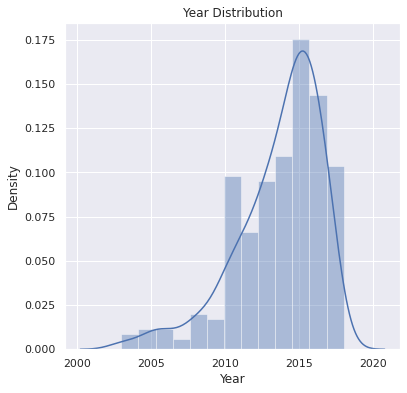

In [40]:
# distribution of year
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(car_dataset['Year'])
plt.title('Year Distribution')
plt.show()

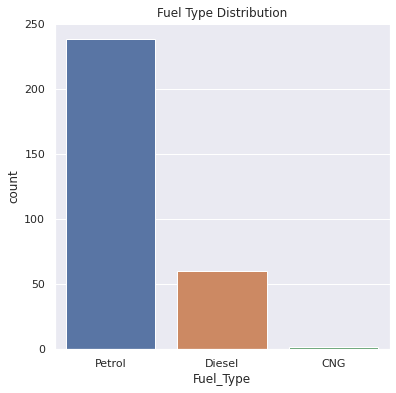

In [41]:
# fuel type column
plt.figure(figsize = (6,6))
sns.countplot(x = 'Fuel_Type', data = car_dataset)
plt.title('Fuel Type Distribution')
plt.show()

In [42]:
car_dataset['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


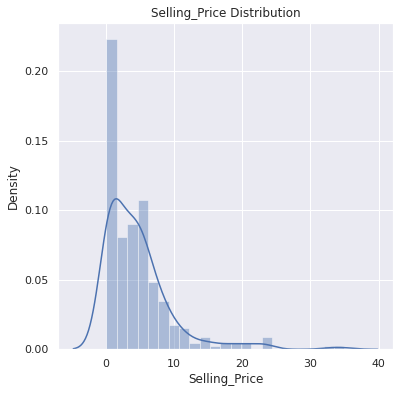

In [43]:
# selling price distribution
plt.figure(figsize = (6,6))
sns.distplot(car_dataset['Selling_Price'])
plt.title('Selling_Price Distribution')
plt.show()

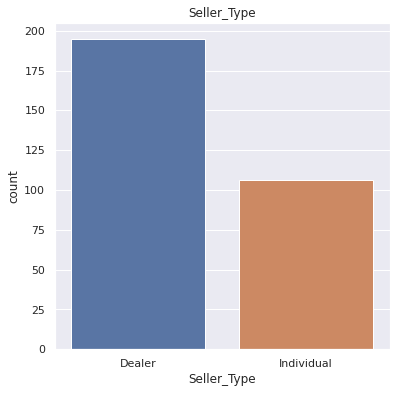

In [44]:
# Seller type column
plt.figure(figsize = (6, 6))
sns.countplot(x = 'Seller_Type', data = car_dataset)
plt.title('Seller_Type')
plt.show()

In [45]:
car_dataset['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

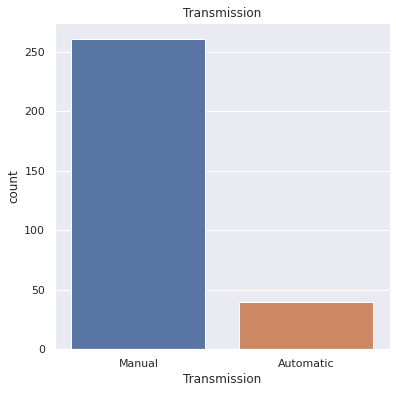

In [46]:
#Transmission Column
plt.figure(figsize = (6,6))
sns.countplot(x = 'Transmission', data = car_dataset)
plt.title('Transmission')
plt.show()

In [47]:
car_dataset['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


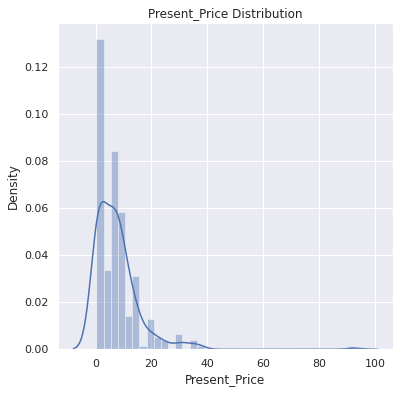

In [48]:
#distribution pf present price
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(car_dataset['Present_Price'])
plt.title('Present_Price Distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


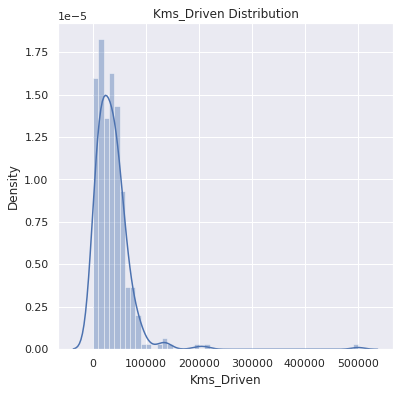

In [49]:
# distribution of kms driven
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(car_dataset['Kms_Driven'])
plt.title('Kms_Driven Distribution')
plt.show()

In [50]:
# ENCODING THE SET COLUMN
car_dataset.replace({'Fuel_Type' : {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace = True)

#ENCODING THE SMOKER COLUMN
car_dataset.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace = True)

# ENCODING THE REGION COLUMN
car_dataset.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace = True)



In [51]:
X = car_dataset.drop(columns = ['Owner', 'Car_Name'], axis = 1)
Y = car_dataset['Owner']

In [52]:
print(X)

     Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
0    2014           3.35           5.59       27000          0            0   
1    2013           4.75           9.54       43000          1            0   
2    2017           7.25           9.85        6900          0            0   
3    2011           2.85           4.15        5200          0            0   
4    2014           4.60           6.87       42450          1            0   
..    ...            ...            ...         ...        ...          ...   
296  2016           9.50          11.60       33988          1            0   
297  2015           4.00           5.90       60000          0            0   
298  2009           3.35          11.00       87934          0            0   
299  2017          11.50          12.50        9000          1            0   
300  2016           5.30           5.90        5464          0            0   

     Transmission  
0               0  
1          

In [53]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
296    0
297    0
298    0
299    0
300    0
Name: Owner, Length: 301, dtype: int64


**Splitting the training data and testing data**

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [55]:
print(X.shape, X_train.shape, X_test.shape)

(301, 7) (240, 7) (61, 7)


In [56]:
print(X.shape, X_train.shape, X_test.shape)

(301, 7) (240, 7) (61, 7)


In [57]:
print(X_train)

     Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
235  2017           9.10           9.40       15141          0            0   
106  2014           1.35           3.45       16500          0            1   
10   2017           2.85           3.60        2135          0            0   
152  2012           0.50           0.99       13000          0            1   
77   2004           1.50          12.35      135154          0            0   
..    ...            ...            ...         ...        ...          ...   
75   2015           3.95           6.80       36000          0            0   
22   2011           4.40           8.01       50000          0            0   
72   2013           7.45          18.61       56001          0            0   
15   2016           7.75          10.79       43000          1            0   
168  2013           0.42           0.73       12000          0            1   

     Transmission  
235             0  
106        

In [58]:
print(Y_train)

235    0
106    1
10     0
152    0
77     0
      ..
75     0
22     0
72     0
15     0
168    0
Name: Owner, Length: 240, dtype: int64


In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

**Model Training**

In [60]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train) # training the algorithm

LinearRegression()

**Model Evaluation**

In [61]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [62]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value:', r2_train)

R squared value: 0.09356215656649924


In [63]:
# prediction on testing data
test_data_prediction = regressor.predict(X_test)

In [64]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value:', r2_test)

R squared value: -0.08244065719681348
